array([-2.68916833e-01, -4.25908898e-03,  1.16302048e+00,  2.37767191e+02,
       -7.80545273e+00])

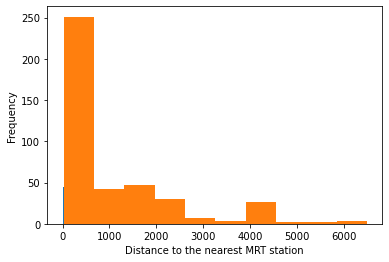

In [45]:
# importing libraries
import pandas as pd
import boto3

# defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'webster-data445-bucket'
bucket = s3.Bucket(bucket_name)

# defining the csv file
file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# reading the csv file
house_price = pd.read_csv(file_content_stream)
house_price.head()

# dropping the No column
house_price = house_price.drop(columns = ['No'])
house_price.head()

# creating a histogram on house_age
import matplotlib.pyplot as plt

plt.hist(house_price['house_age'])
plt.xlabel('House Age')
plt.ylabel('Frequency')
plt.grid()
#plt.show()   ## The histogram appears to be bimodal and right skewed.

# creating a histogram of distance_to_MRT_station
plt.hist(house_price['distance_to_the_nearest_MRT_station'])
plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('Frequency')
plt.grid()
#plt.show()   ## The histogram is right skewed with one peak around 400.

# building a linear regression model
from sklearn.linear_model import LinearRegression

# defining the input and target variable
X = house_price[['house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
Y = house_price['house_price_of_unit_area']

# Building the model
lm_md = LinearRegression().fit(X, Y)
lm_md.coef_